
#Assignment on Classification





In [160]:
#Import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [161]:
#Load the dataset
data = pd.read_excel('/content/iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Data visualization

In [162]:
#Analyse the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


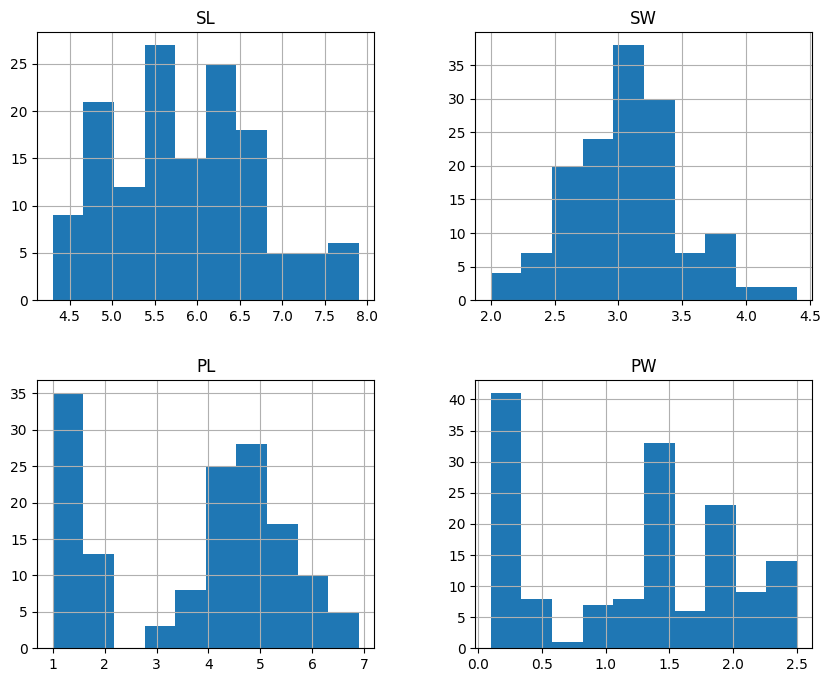

In [163]:
# to get the distribution of data in the numerical columns
freq_graph = data.select_dtypes(include='float64')
freq_graph.hist(figsize=(10,8));


#Data Preprocessing

Checking missing value and handle.

In [164]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [165]:
data['SL'] = data['SL'].fillna(data['SL'].mean())
data['SW'] = data['SW'].fillna(data['SW'].mean())
data['PL'] = data['PL'].fillna(data['PL'].median())


In [166]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Checking duplicates and remove it

In [167]:
data.duplicated().sum()


3

In [168]:
data = data.drop_duplicates()


In [169]:
data.shape

(147, 5)

Check outliers and handle the outliers

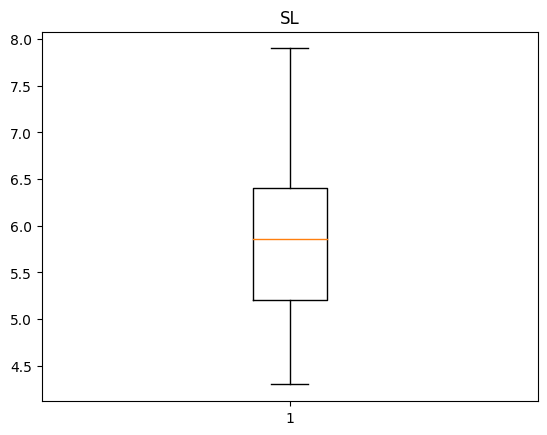

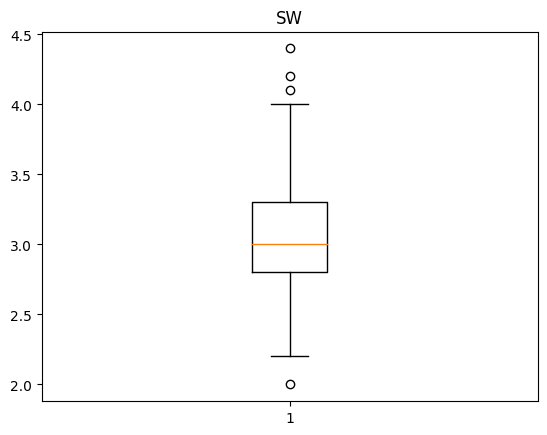

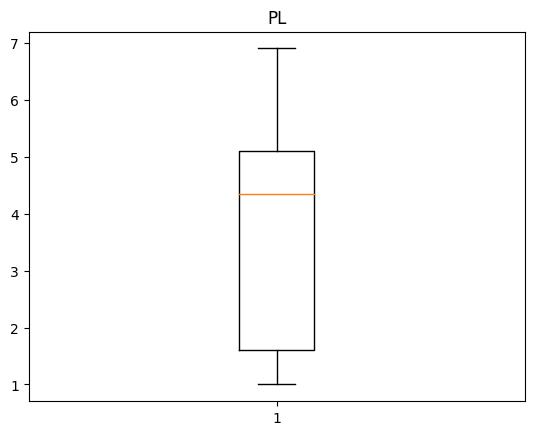

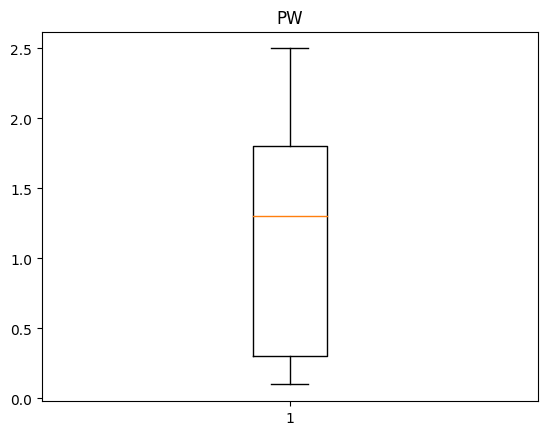

In [170]:
num_columns=data.select_dtypes(include='float64')
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


Outlier detected in SW .Find outliers using IQR method and handle with clip function.

In [171]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("lower limit:",low_lim)
print("upper limit:",up_lim)
outlier=[]
for x in data['SW']:
  if(x<low_lim) or (x>up_lim):
    outlier.append(x)
print(outlier)
#clip method to handle
data['SW'] = data['SW'].clip(lower=low_lim,upper=up_lim)


lower limit: 2.05
upper limit: 4.05
[4.4, 4.1, 4.2, 2.0]


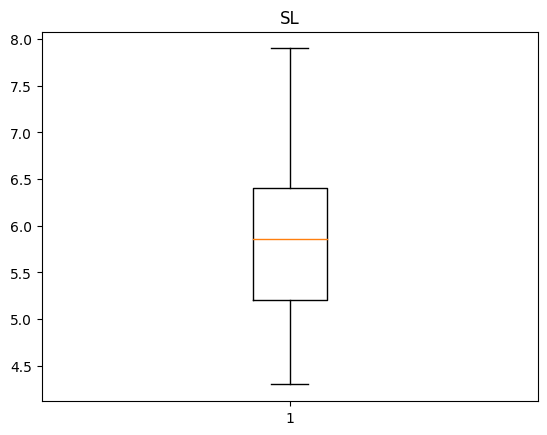

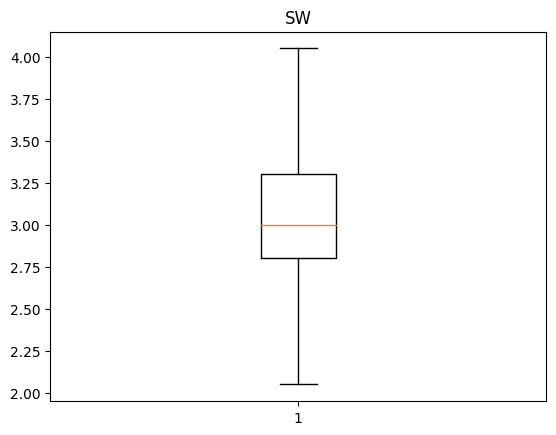

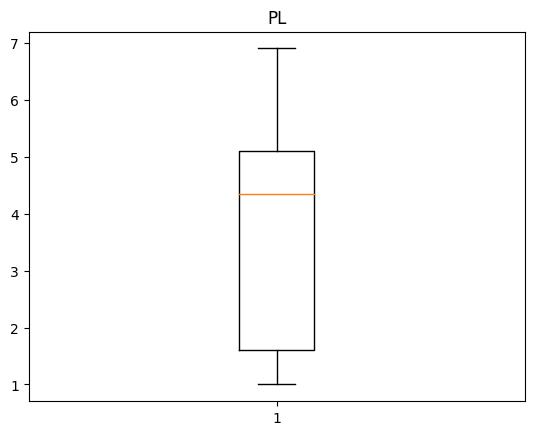

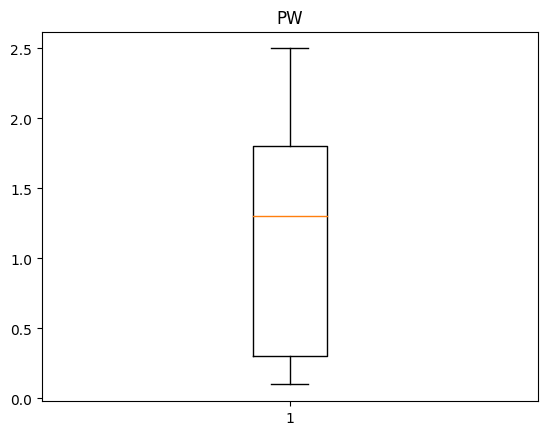

In [172]:
#Check outliers handled
num_columns=data.select_dtypes(include='float64')
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


In [173]:
data['Classification'].value_counts() #Check distribution of data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

Almost all classes are equal

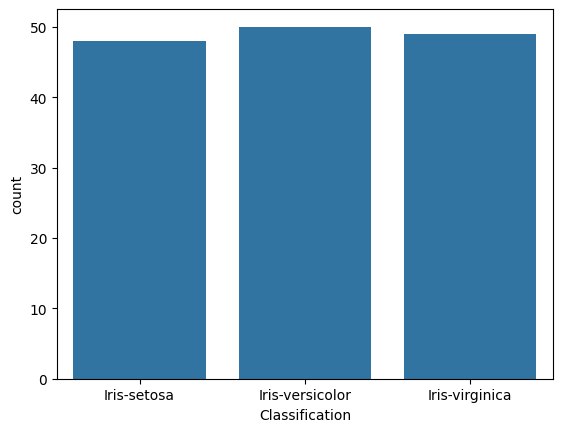

In [174]:
sns.countplot(x='Classification', data=data, ) #Plotting classification count
plt.show()


Draw correlation map to find correlated variables

<ipython-input-175-9eee49471d32>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix= data.corr()


<Axes: >

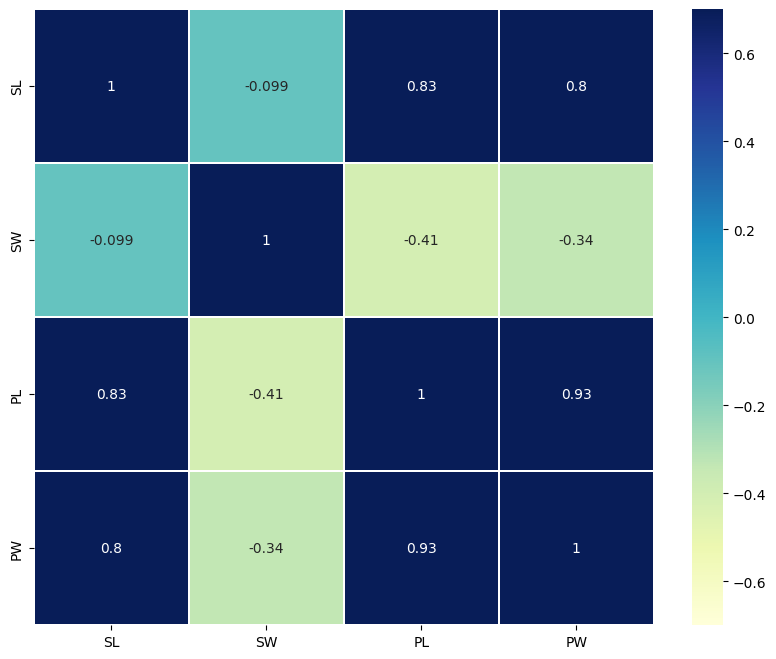

In [175]:
corrmatrix= data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

PW and PL are highly correlated with 0.93.
PL and SL are highly correlated with 0.83.
Here doesn't drop any column, we have only few columns.

Label Encoding

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])



Assign dependent variable and independent variable

In [177]:
y = data['Classification']
x= data.drop(['Classification'],axis=1)

Split the data for training and test purpose

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=.25)#25% data for test

Scaling

In [179]:
#Do Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [180]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)


#Classification Models

#1.Logistic Regression Model

In [181]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)


In [182]:
log_reg.fit(x_train,y_train)
y_log_pred = log_reg.predict(x_test)


In [183]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score  #metrics for evaluating model

In [184]:
confusion_matrix(y_test,y_log_pred)

array([[14,  0,  0],
       [ 1,  8,  1],
       [ 0,  1, 12]])

In [185]:
log_accuracy = accuracy_score(y_test,y_log_pred)
print("Accuracy: ",accuracy_score(y_test,y_log_pred))
print("Precision: ",precision_score(y_test,y_log_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_log_pred,average='micro'))
print("f1 score: ",f1_score(y_test,y_log_pred,average='micro'))
result = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy':[log_accuracy]})


Accuracy:  0.918918918918919
Precision:  0.918918918918919
Recall:  0.918918918918919
f1 score:  0.918918918918919


Using scaled data

In [186]:
log_sc_model = log_reg.fit(x_train_sc,y_train)
y_log_pred_sc = log_sc_model.predict(x_test_sc)
log_sc_accuracy = accuracy_score(y_test,y_log_pred_sc)
log_sc_accuracy

0.9459459459459459

In [187]:
result2 = pd.DataFrame({'Model': ['Logistic Regression Scaled'], 'Accuracy':[log_sc_accuracy]})


Scaled data gives good performane. Accuracy of Logistic model using scaled data (0.9459459459459459) is higher than model witout scaled data(0.918918918918919)

#2.KNN Model

In [188]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [189]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

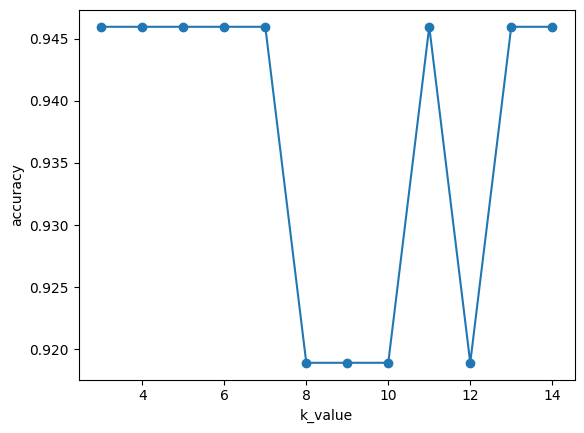

In [190]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [191]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) #3 is the highest data point
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)


In [192]:
knn_accuracy = accuracy_score(y_test,y_pred_knn)
print("Accuracy: ",accuracy_score(y_test,y_pred_knn))
print("Precision: ",precision_score(y_test,y_pred_knn,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_knn,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_knn,average='micro'))

Accuracy:  0.9459459459459459
Precision:  0.9459459459459459
Recall:  0.9459459459459459
f1 score:  0.9459459459459459


In [193]:
result3 = pd.DataFrame({'Model': ['KNN'], 'Accuracy':[knn_accuracy]})


KNN Using scaled data

In [194]:
metric_k = []
neighbors = np.arange(3,15)

In [195]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  knn_model_sc = classifier.fit(x_train_sc,y_train)
  y_pred_knn_sc = knn_model_sc.predict(x_test_sc)
  accuracy= accuracy_score(y_test,y_pred_knn_sc)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

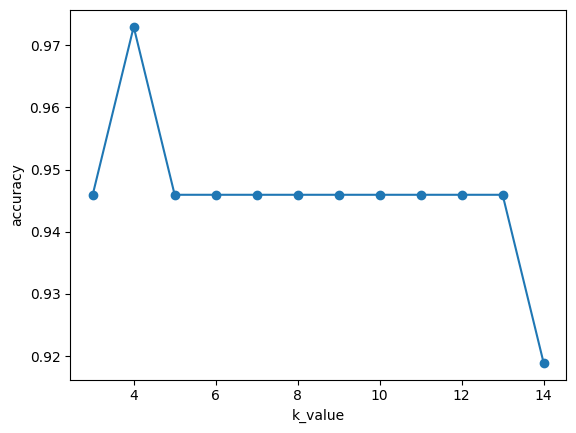

In [196]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [197]:
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2) #4 is the highest data point
knn_model_sc = classifier.fit(x_train_sc,y_train)
y_pred_knn_sc = knn_model_sc.predict(x_test_sc)


In [198]:
knn_sc_accuracy = accuracy_score(y_test,y_pred_knn_sc)
print("Accuracy: ",accuracy_score(y_test,y_pred_knn_sc))
print("Precision: ",precision_score(y_test,y_pred_knn_sc,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_knn_sc,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_knn_sc,average='micro'))

Accuracy:  0.972972972972973
Precision:  0.972972972972973
Recall:  0.972972972972973
f1 score:  0.972972972972973


In [199]:
result4 = pd.DataFrame({'Model': ['KNNScaled  '], 'Accuracy':[knn_sc_accuracy]})


Scaled data gives better model. Accuracy of Scaled KNN is 0.972972972972973 ,Which is higher than KNN model without scaling 0.9459459459459459

#3.SVM model

In [200]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='poly')#hypermarameter turning with polinomeal kernel
sv_cl.fit(x_train,y_train)

SVC(kernel='poly')

In [201]:
y_pred_svm = sv_cl.predict(x_test)

In [202]:
svm_accuracy_poly = accuracy_score(y_test,y_pred_svm)
print("Accuracy: ",accuracy_score(y_test,y_pred_svm))
print("Precision: ",precision_score(y_test,y_pred_svm,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_svm,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_svm,average='micro'))

Accuracy:  0.9459459459459459
Precision:  0.9459459459459459
Recall:  0.9459459459459459
f1 score:  0.9459459459459459


In [203]:
result5 = pd.DataFrame({'Model': ['SVM(kernel ploy)  '], 'Accuracy':[svm_accuracy_poly]})


Change kernel and checking accuracy

In [204]:
sv_cl = SVC(kernel='linear')#Linear
svcl_lin = sv_cl.fit(x_train,y_train)
y_pred_svm = svcl_lin.predict(x_test)
svm_accuracy_lin = accuracy_score(y_test,y_pred_svm)
print("Accuracy: ",accuracy_score(y_test,y_pred_svm))
print("Precision: ",precision_score(y_test,y_pred_svm,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_svm,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_svm,average='micro'))

Accuracy:  0.972972972972973
Precision:  0.972972972972973
Recall:  0.972972972972973
f1 score:  0.972972972972973


In [205]:
result6 = pd.DataFrame({'Model': ['SVM(kernel Linear)  '], 'Accuracy':[svm_accuracy_lin]})


In [225]:
sv_cl = SVC(kernel='rbf')#hypermarameter turning with rbf
svcl_rbf = sv_cl.fit(x_train,y_train)
y_pred_svm = svcl_rbf.predict(x_test)
svm_accuracy_rbf = accuracy_score(y_test,y_pred_svm)
print("Accuracy: ",accuracy_score(y_test,y_pred_svm))
print("Precision: ",precision_score(y_test,y_pred_svm,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_svm,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_svm,average='micro'))

Accuracy:  0.918918918918919
Precision:  0.918918918918919
Recall:  0.918918918918919
f1 score:  0.918918918918919


In [207]:
result7 = pd.DataFrame({'Model': ['SVM(kernel rbf)  '], 'Accuracy':[svm_accuracy_rbf]})


SVM using sclaled data

In [208]:
sv_cl = SVC(kernel='linear')#Only checking with linear. Linear got high value
svcl_sc = sv_cl.fit(x_train_sc,y_train)
y_pred_svm_sc = svcl_sc.predict(x_test_sc)
svm_sc_accuracy = accuracy_score(y_test,y_pred_svm_sc)
print("Accuracy: ",accuracy_score(y_test,y_pred_svm_sc))
print("Precision: ",precision_score(y_test,y_pred_svm_sc,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_svm_sc,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_svm_sc,average='micro'))

Accuracy:  0.9459459459459459
Precision:  0.9459459459459459
Recall:  0.9459459459459459
f1 score:  0.9459459459459459


In [209]:
result8 = pd.DataFrame({'Model': ['SVM(kernel linear) scaled '], 'Accuracy':[svm_sc_accuracy]})


Scaled data gives low accuracy.

#4.Decision tree

In [210]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred_tree = dt_clf.predict(x_test)


In [211]:
tree_accuracy = accuracy_score(y_test,y_pred_tree)
print("Accuracy: ",accuracy_score(y_test,y_pred_tree))
print("Precision: ",precision_score(y_test,y_pred_tree,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_tree,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_tree,average='micro'))

Accuracy:  0.918918918918919
Precision:  0.918918918918919
Recall:  0.918918918918919
f1 score:  0.918918918918919


In [212]:
result9 = pd.DataFrame({'Model': ['Decision tree '], 'Accuracy':[tree_accuracy]})


#5.Random forest

In [213]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 =RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy')#Done hyper parameter tuning
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=20)

In [214]:
y_pred_random = rf_clf1.predict(x_test)


In [215]:
random_accuracy = accuracy_score(y_test,y_pred_random)

print("Accuracy: ",accuracy_score(y_test,y_pred_random))
print("Precision: ",precision_score(y_test,y_pred_random,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_random,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_random,average='micro'))

Accuracy:  0.9459459459459459
Precision:  0.9459459459459459
Recall:  0.9459459459459459
f1 score:  0.9459459459459459


In [216]:
result10 = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy':[random_accuracy]})


In [224]:
# Append all resul values
frames = [result, result2, result3,result4,result5,result6,result7,result8,result9,result10]
results = pd.concat(frames)
results


,Model,Accuracy
0,Logistic Regression,0.918919
0,Logistic Regression Scaled,0.945946
0,KNN,0.945946
0,KNNScaled,0.972973
0,SVM(kernel ploy),0.945946
0,SVM(kernel Linear),0.972973
0,SVM(kernel rbf),0.918919
0,SVM(kernel linear) scaled,0.945946
0,Decision tree,0.918919
0,Random Forest,0.945946


#Conclusion:
5 Classification models; Logistic regression model,KNN model,SVM model,Decision tree and random forest model are tried.

All models are giving accuracy above 0.9. KNN model using scaled data and  SVM model with linear kernel have higher accuracy than other models. So **KNN model** and **SVM model** are best models.

#Cross Validation

In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)


Checking cross validation score.Best performing models are taken from 5 models

Checking validation score of

In [219]:
log_cv_score = cross_val_score(log_sc_model,x,y,cv = stratified_cv)
knn_cv_score = cross_val_score(knn_model_sc,x,y,cv = stratified_cv)
svm_cv_score = cross_val_score(svcl_lin,x,y,cv = stratified_cv)
dt_cv_score = cross_val_score(dt_clf,x,y,cv = stratified_cv)
rf_cv_score = cross_val_score(rf_clf1,x,y,cv = stratified_cv)


In [220]:
cv_log = log_cv_score.mean()
knn_cv = knn_cv_score.mean()
svm_cv = svm_cv_score.mean()
dt_cv = dt_cv_score.mean()
rf_cv = rf_cv_score.mean()


In [223]:
cv_scores = {'Model': ['Logistic regression scaled', 'KNN scaled', 'SVM(Linear)', 'Decision tree','Random forest'],
        'Score': [cv_log, knn_cv, svm_cv, dt_cv,rf_cv]}

cv_scores = pd.DataFrame(cv_scores)
print(cv_scores)


                        Model     Score
0  Logistic regression scaled  0.938571
1                  KNN scaled  0.959048
2                 SVM(Linear)  0.952857
3               Decision tree  0.946190
4               Random forest  0.966667


All models give cross validation score above 0.9. Random Forest model has high cross validation score.